Some of the same plots on drinking keyworded over the month of september (500000)

In [1]:
import pickle

%matplotlib inline

from plotting.alcohol import ComparisonPlot

In [2]:
drinking = pickle.load(open('pickles/sept_drinking_labeled.p', 'rb'))

In [3]:
drinking.shape

(498509, 15)

In [4]:
drinking.head()

,Unnamed: 0,Unnamed: 0.1,text,id,created_at,random_number,predict_alc,predict_fpa,predict_fpa|alc,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past
created_at,,,,,,,,,,,,,,,
2015-09-01 00:34:07,369510,34859,Bitch you look like a pack of chickens drinkin...,638510110281699328,Tue Sep 01 00:34:07 +0000 2015,8936304477203603732,0.997060,0.307606,0.308513,0.029184,0.031485,0.939331,0.008977,0.009685,0.288944
2015-09-01 00:49:36,370650,35999,@SkittlesCanFly_ lies. You drink water you hyd...,638514005808672768,Tue Sep 01 00:49:36 +0000 2015,7203717350631723890,0.031360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-09-01 01:07:56,372393,37742,Drinkin out the bottle 👀😂😂,638518618343477248,Tue Sep 01 01:07:56 +0000 2015,-6897460529745918969,0.526372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-09-01 01:11:12,372683,38032,I swear I hope this drink relaxes me to the core,638519440217374720,Tue Sep 01 01:11:12 +0000 2015,-7064333736343174870,0.989091,0.595163,0.601727,0.227778,0.735366,0.036856,0.135565,0.437662,0.021935
2015-09-01 01:20:26,373453,38802,"Whoa ok I'm drunk (@ BARn in Astoria, NY) http...",638521764058955776,Tue Sep 01 01:20:26 +0000 2015,-224048180445183780,0.957415,0.661896,0.691336,0.991044,0.006467,0.002489,0.655968,0.004281,0.001647


In [5]:
plot = ComparisonPlot()

In [6]:
plot.setup(drinking)

C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["first_person_alcohol"][of_interest] = 1


C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:74: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  means = pd.rolling_mean(temp[[1, 3, 5]], 3)
C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:76: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  stds = pd.rolling_mean(temp[[0, 2, 4]], 3)
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


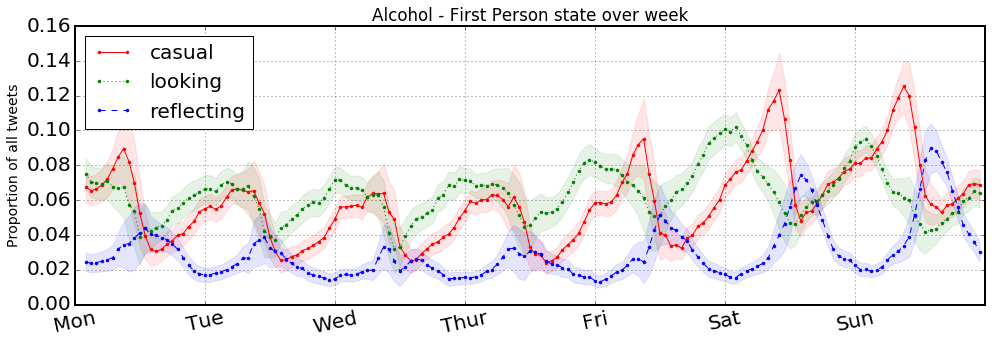

In [7]:
plot.plot_fps_week(drinking, '')